In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sys
import IPython
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split

In [2]:
# Load data and remove outliners
df_full = pd.read_csv("train_NIR5Yl1.csv")
print(df_full.describe())

df_full = df_full.sort_values('Upvotes')
n = len(df_full)
ex_data = math.floor(0*n/100)
df = df_full[ex_data:n-ex_data]

n= len(df)
ex_data = math.floor(0*n/100)
df= df.sort_values('Views')
df = df[ex_data:n-ex_data]

n= len(df)
ex_data = math.floor(0*n/100)
df=df.sort_values('Reputation')
df = df[ex_data:n-ex_data]

df = df[df['Views']<150000]

                  ID    Reputation        Answers       Username  \
count  330045.000000  3.300450e+05  330045.000000  330045.000000   
mean   235748.682789  7.773147e+03       3.917672   81442.888803   
std    136039.418471  2.706141e+04       3.579515   49215.100730   
min         1.000000  0.000000e+00       0.000000       0.000000   
25%    117909.000000  2.820000e+02       2.000000   39808.000000   
50%    235699.000000  1.236000e+03       3.000000   79010.000000   
75%    353620.000000  5.118000e+03       5.000000  122559.000000   
max    471493.000000  1.042428e+06      76.000000  175738.000000   

              Views        Upvotes  
count  3.300450e+05  330045.000000  
mean   2.964507e+04     337.505358  
std    8.095646e+04    3592.441135  
min    9.000000e+00       0.000000  
25%    2.594000e+03       8.000000  
50%    8.954000e+03      28.000000  
75%    2.687000e+04     107.000000  
max    5.231058e+06  615278.000000  


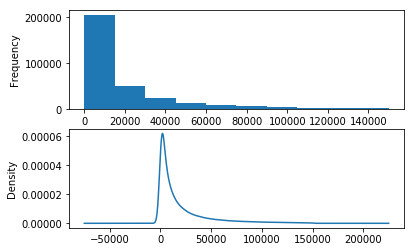

In [3]:
#hist = np.histogram(Y,bins = 40)
#plt.hist(Y,bins=10)
plt.figure(1)
plt.subplot(2,1,1)
df['Views'].plot(kind='hist')
plt.subplot(2,1,2)
df['Views'].plot(kind='kde')

In [4]:
# Dummy code Tag column and add to main data
dummies = pd.get_dummies(df['Tag'])
dummy_cols = ['c','h','i','j','o','p','r','s','x']
normal_cols = ['Reputation','Views']
df = pd.concat([df,dummies],axis=1)
df.drop(['Tag','a'],inplace=True,axis =1 )

In [5]:
# Normalise numerical columns
#from sklearn.preprocessing import StandardScaler, normalize
#scaler = StandardScaler()
#df[normal_cols] = scaler.fit_transform(df[normal_cols])

In [6]:
#X = df.loc[:, ['Reputation','Answers','Views'] ]
X = df.loc[:, ['ID'] + normal_cols  + dummy_cols]
#X = df.loc[:, ['Views'] ]
Y = df.loc[:, 'Upvotes']

In [7]:
# split data
x_train, x_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.3, random_state=100)

In [8]:
ID_train = x_train['ID']
ID_test = x_test['ID']
x_train = x_train.drop(['ID'],axis =1 )
x_test = x_test.drop(['ID'],axis =1 )

In [9]:
# Create poly matrices
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly_x_train = poly.fit_transform(x_train)
poly_x_test = poly.fit_transform(x_test)

In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
LR = LinearRegression()
#LR = Ridge(alpha = 10)
#LR = Lasso(alpha = 10)
LR.fit(poly_x_train,y_train)
y_train_pred = LR.predict(poly_x_train).round()
y_test_pred = LR.predict(poly_x_test).round()

In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_train,y_train_pred))
print("RMS error train: ",rms)
rms = sqrt(mean_squared_error(y_test,y_test_pred))
print("RMS error test: ",rms)
print(LR.score(poly_x_train,y_train))
print(LR.score(poly_x_test,y_test))

RMS error train:  311.8224114100072
RMS error test:  292.7416952022454
0.899576427674568
0.8960343910584277


In [12]:
#plt.scatter(ID_train[1:100], y_train[1:100],  color='black')
#plt.scatter(ID_train[1:100], y_train_pred[1:100],  color='blue')
#plt.scatter(x_train.loc[:,'Reputation'], y_train_pred,  color='red')
#plt.scatter(x_train[:,1], y_train[:,1],  color='black')
#plt.plot(x_train, LR.predict(x_train),color= 'red')
#plt.title('Train Data')
#plt.xlabel('X')
#plt.ylabel('Y')
#plt.show()

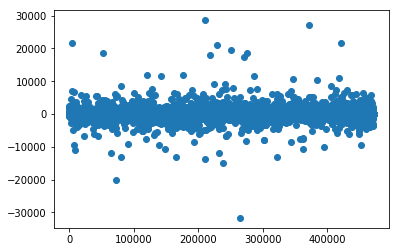

In [13]:
residuals_train = y_train.subtract(y_train_pred)
plt.scatter(ID_train,residuals_train)

In [14]:
test_df = pd.read_csv('test_8i3B3FC.csv')

test_df = test_df[test_df['Views']<150000]

dummies = pd.get_dummies(test_df['Tag'])
test_df = pd.concat([test_df,dummies],axis=1)

test_df.drop(['Tag','a'],inplace=True,axis =1 )
#test_df[normal_cols] = scaler.fit_transform(test_df[normal_cols])
X = test_df.loc[:, normal_cols + dummy_cols ]
poly_X = poly.fit_transform(X)
print(list(x_train))
print(list(X))
y_submit = LR.predict(poly_X).round()

['Reputation', 'Views', 'c', 'h', 'i', 'j', 'o', 'p', 'r', 's', 'x']
['Reputation', 'Views', 'c', 'h', 'i', 'j', 'o', 'p', 'r', 's', 'x']


In [15]:
test_df['Upvotes'] = y_submit
submit_data = test_df.loc[:,['ID','Upvotes']]
submit_data.to_csv('out1.csv',index=False)